## Import libraries

In [1]:
# generic tools
import numpy as np
import datetime 

# tools from sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
%load_ext tensorboard
# delete logs from previous runs - not always safe!
!rm -rf ./logs/

## Download data, train-test split, binarize labels

In [2]:
data, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

# to data
data = data.astype("float")/255.0

# split data
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels, 
                                                  test_size=0.2)

# convert labels to one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

## Define neural network architecture using ```tf.keras```

In [3]:
# define architecture 784x256x128x10
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax")) # generalisation of logistic regression for multiclass task

## Show summary of model architecture

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

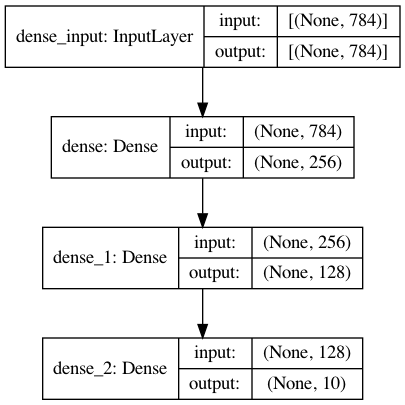

In [5]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

In [6]:
# train model using SGD
sgd = SGD(1e-2)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

## Set ```tensorboard``` parameters - not compulsory!

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                      histogram_freq=1)

## Train model and save history

In [ ]:
history = model.fit(trainX, trainY, 
                    validation_data=(testX,testY), 
                    epochs=100, 
                    batch_size=128,
                    callbacks=[tensorboard_callback])

Epoch 1/100
438/438 [==============================] - 2s 4ms/step - loss: 2.3059 - accuracy: 0.1420 - val_loss: 2.2460 - val_accuracy: 0.3663
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 2.2309 - accuracy: 0.3536 - val_loss: 2.1785 - val_accuracy: 0.4581
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 2.1597 - accuracy: 0.4864 - val_loss: 2.0883 - val_accuracy: 0.4735
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 2.0618 - accuracy: 0.5459 - val_loss: 1.9589 - val_accuracy: 0.6129
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 1.9203 - accuracy: 0.6039 - val_loss: 1.7823 - val_accuracy: 0.6325
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 1.7367 - accuracy: 0.6555 - val_loss: 1.5729 - val_accuracy: 0.6772
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 1.5242 - accuracy: 0.6950 - val_loss: 1.3654 - val_accuracy: 0.7379

## Visualise using ```matplotlib```

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 100), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Inspect using ```tensorboard```

This won't run on JupyterHub!

In [ ]:
%tensorboard --logdir logs/fit

## Classifier metrics

In [ ]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))